## 1. Detection task

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
def get_zero_prob(alpha, beta):

    zero_prob = np.random.normal(0, np.sqrt((1+0**alpha)**beta), 10000)
    
    return zero_prob

In [3]:
def get_non_zero_prob(stim_x, mu, alpha, beta):
    
    sd=np.sqrt((1+mu**alpha)**beta)
    nz_pr = norm.cdf(stim_x, mu, sd)
    
    return nz_pr

In [4]:
def detect(n_trial, stim_x, sub_responses, model_prob):
    
    sub_resp_arr = [[] for stim in stim_x]
    cnt = 0
    
    for i in range(len(stim_x)):
        cur_model_prob = model_prob[i]
        
        for n in range(n_trial):
            cur_sub_resp_pr = sub_responses[cnt]
            
            if cur_sub_resp_pr <= cur_model_prob:
                sub_resp_arr[i].append(1)
            else:
                sub_resp_arr[i].append(0)
            
            cnt+=1
        
    return sub_resp_arr

In [5]:
def analysis(detect_resp_arr):
    
    correct_pr=[]
    for i in range(len(detect_resp_arr)):
        num_correct = np.sum(detect_resp_arr[i])
        num_trial = len(detect_resp_arr[i])
        correct_pr.append(num_correct / num_trial)
        
    return correct_pr 

In [6]:
mus = np.arange(10, 91, 10)
alphas = np.arange(0, 3.5, 0.5)
betas = np.arange(0, 3.5, 0.5)

In [7]:
n_trial = 100
stim_x = np.arange(0,101,10)

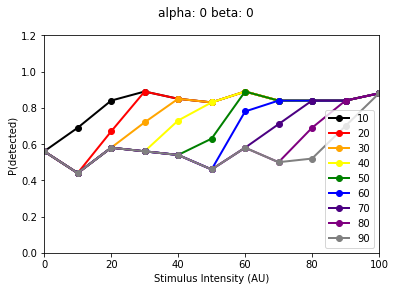

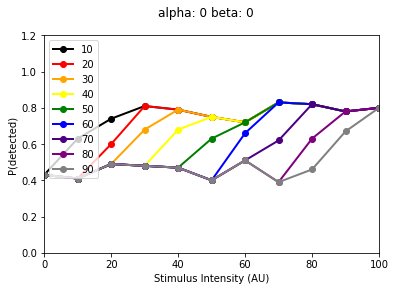

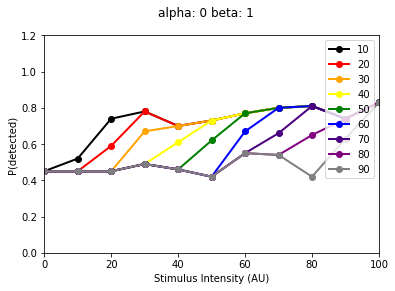

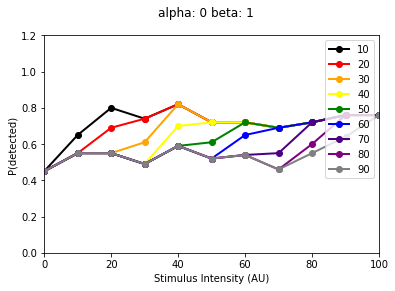

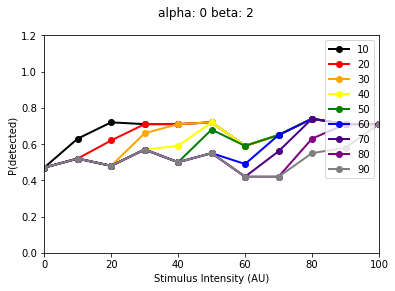

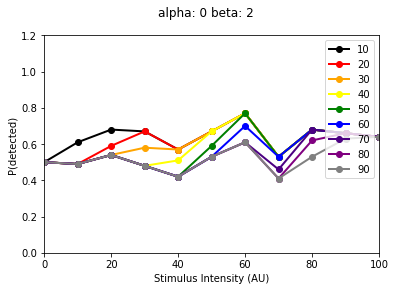

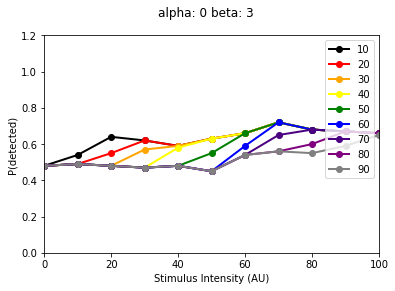

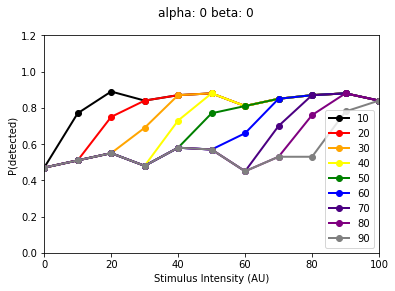

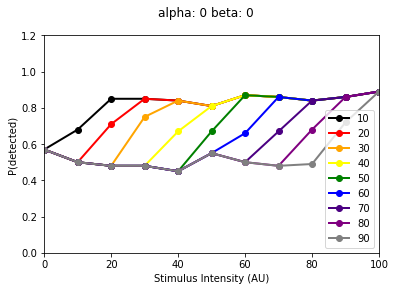

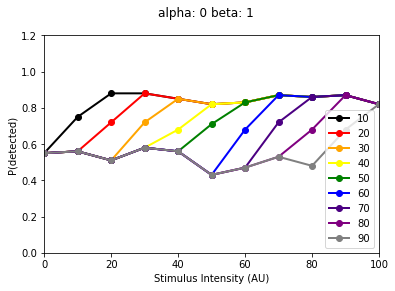

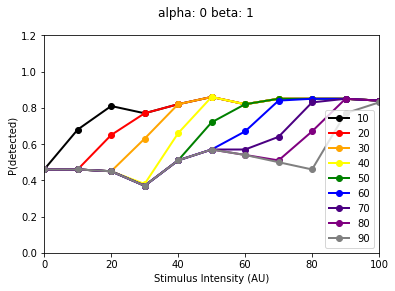

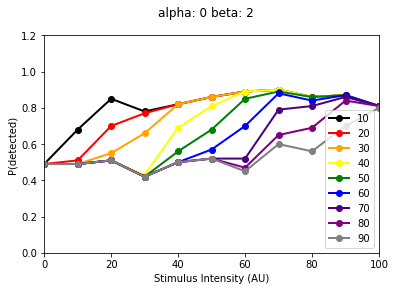

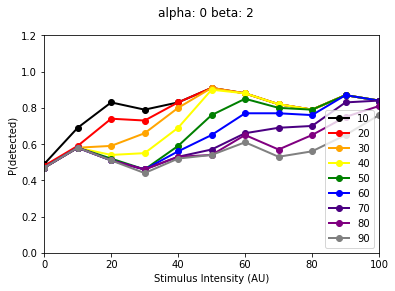

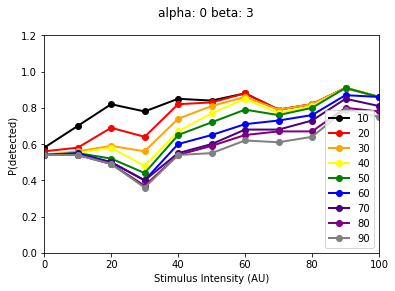

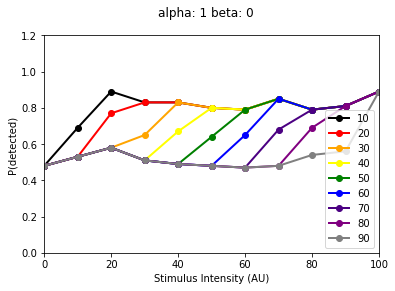

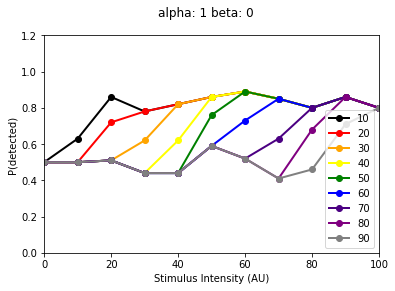

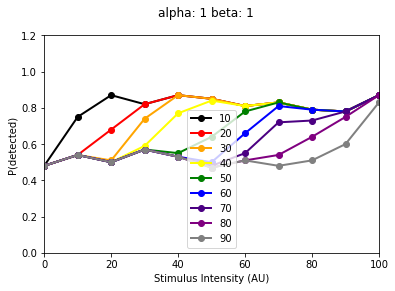

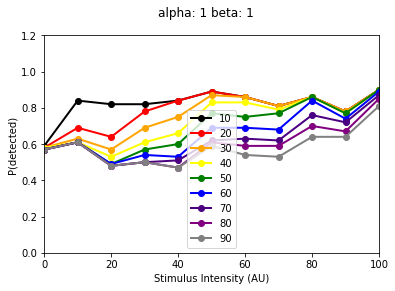

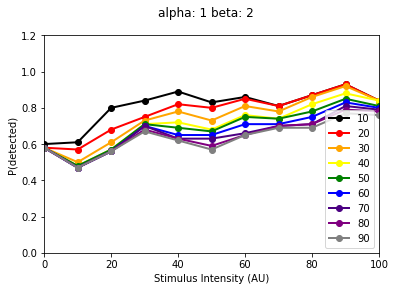

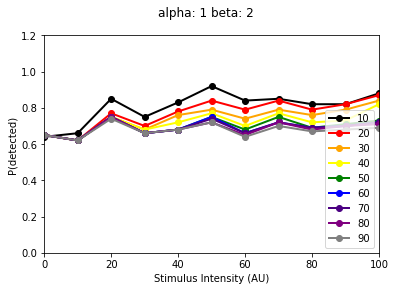

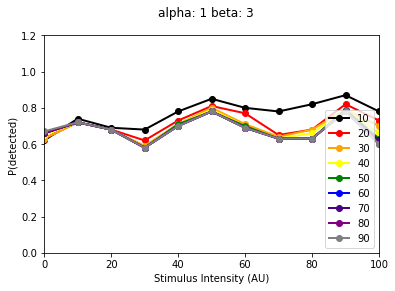

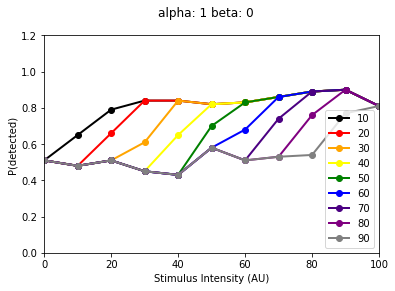

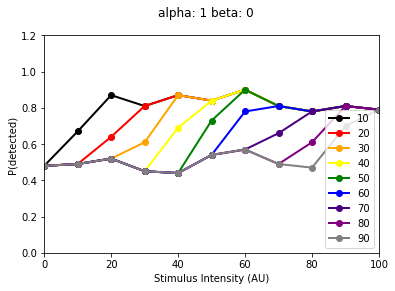

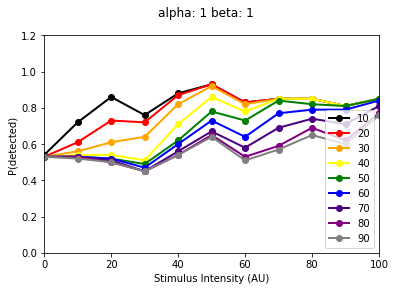

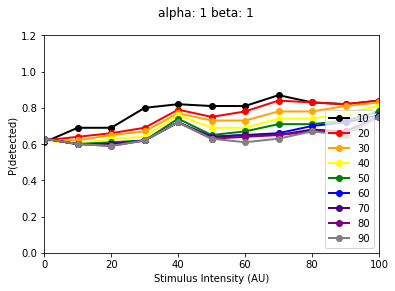

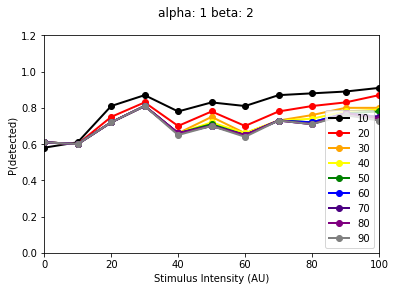

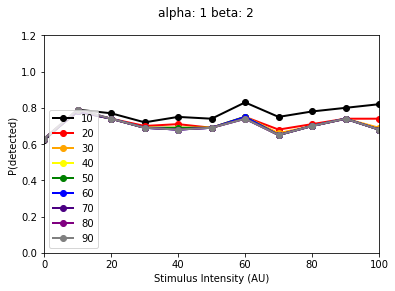

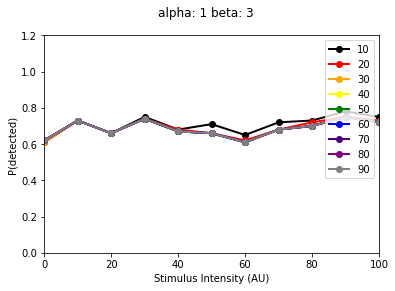

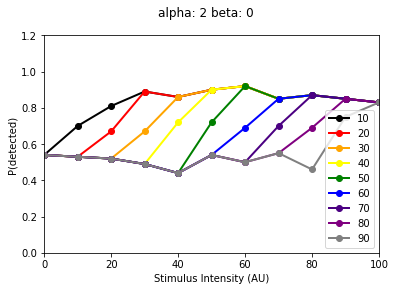

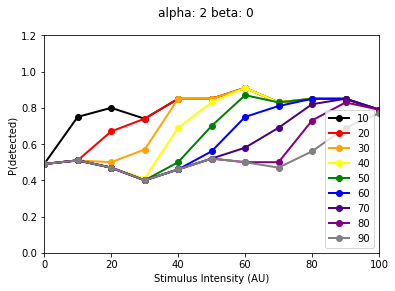

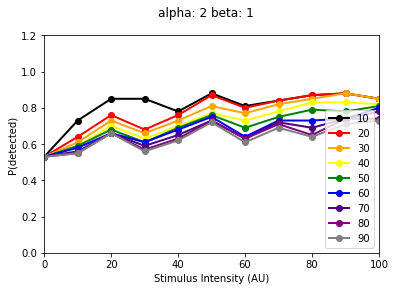

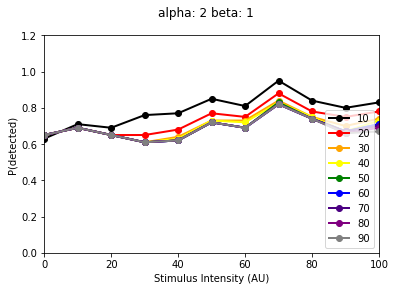

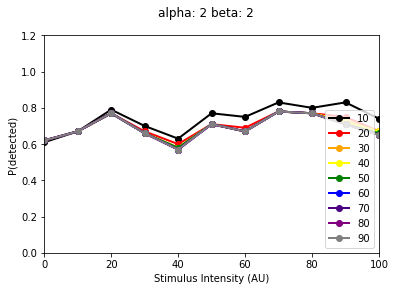

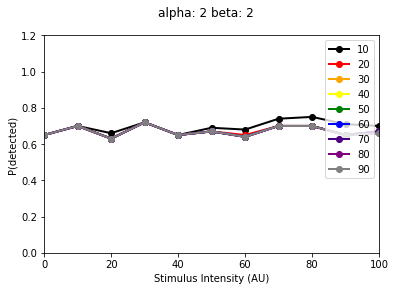

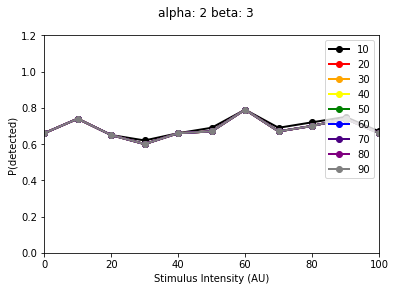

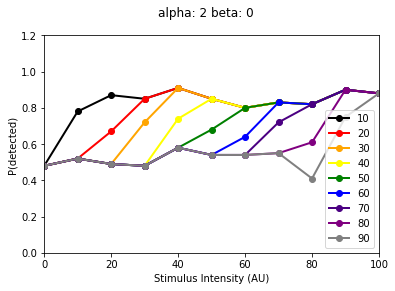

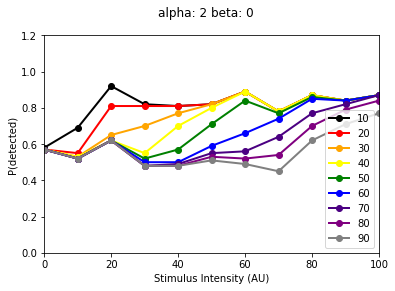

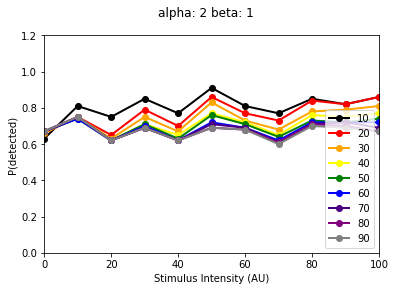

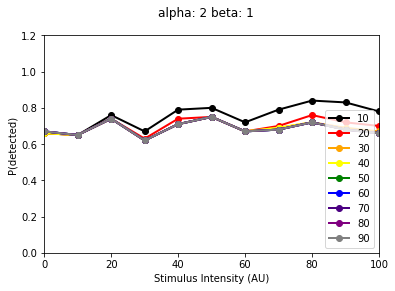

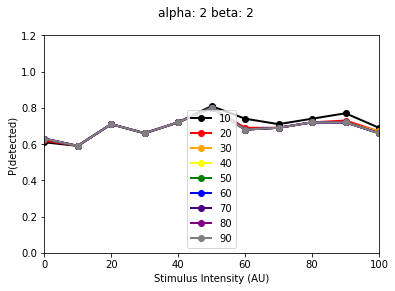

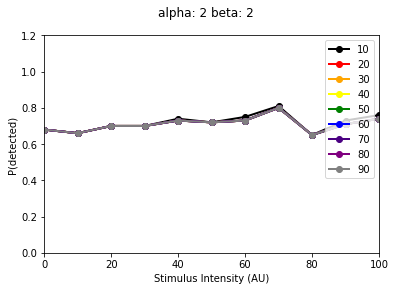

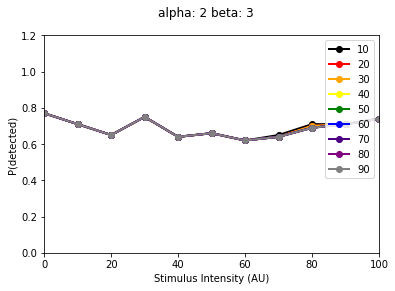

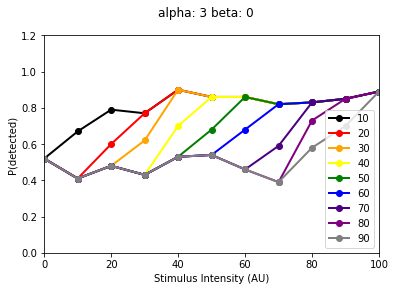

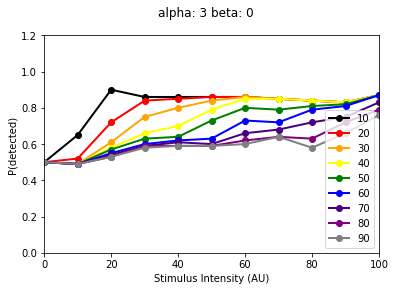

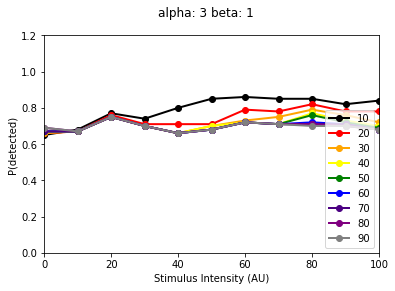

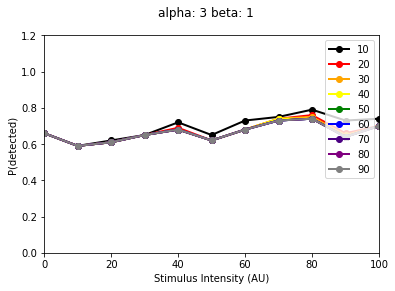

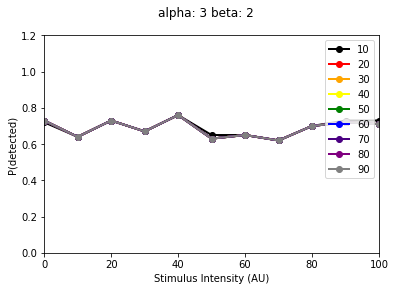

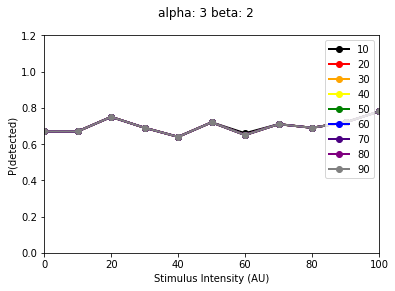

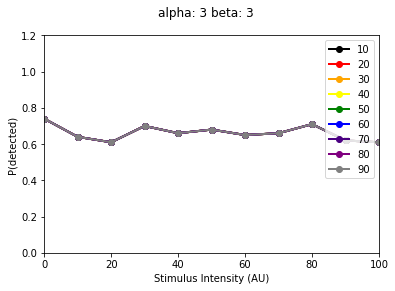

In [8]:
for i in range(len(alphas)):
    for j in range(len(betas)):
        zero_resp = get_zero_prob(alphas[i], betas[j])

        pr_correct = []
        
        for k in range(len(mus)):
            non_zero_prob = get_non_zero_prob(stim_x, mus[k], alphas[i], betas[j])
            
            detect_resp = detect(n_trial, stim_x, zero_resp, non_zero_prob)
            cur_pr_correct = analysis(detect_resp)
            pr_correct.append(cur_pr_correct)


        plt.suptitle("alpha: %d beta: %d" %(alphas[i], betas[j]))
        plt.plot(stim_x, pr_correct[0], color='black', marker='o', lw=2, label="10")
        plt.plot(stim_x, pr_correct[1], color='red', marker='o', lw=2, label="20")
        plt.plot(stim_x, pr_correct[2], color='orange', marker='o', lw=2, label="30")
        plt.plot(stim_x, pr_correct[3], color='yellow', marker='o', lw=2, label="40")
        plt.plot(stim_x, pr_correct[4], color='green', marker='o', lw=2, label="50")
        plt.plot(stim_x, pr_correct[5], color='blue', marker='o', lw=2, label="60")
        plt.plot(stim_x, pr_correct[6], color='indigo', marker='o', lw=2, label="70")
        plt.plot(stim_x, pr_correct[7], color='purple', marker='o', lw=2, label="80")
        plt.plot(stim_x, pr_correct[8], color='grey', marker='o', lw=2, label="90")
        plt.legend()
        plt.xlim(0, 100)
        plt.ylim(0, 1.2)
        plt.xlabel("Stimulus Intensity (AU)")
        plt.ylabel("P(detected)")
        plt.show()

## 2. Discrimination task

In [9]:
def get_fifty_prob(alpha, beta):

    prob = np.random.normal(50, np.sqrt((1+50**alpha)**beta), 10000)
    
    return prob

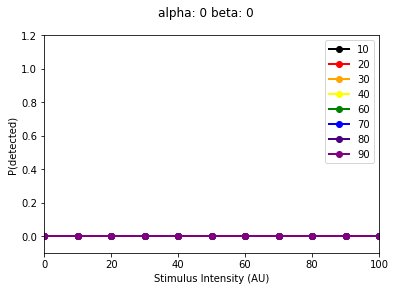

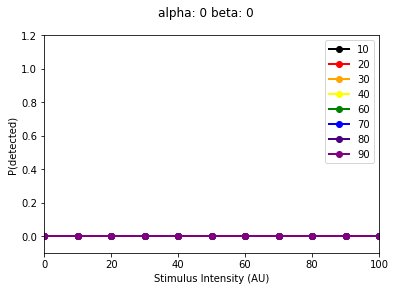

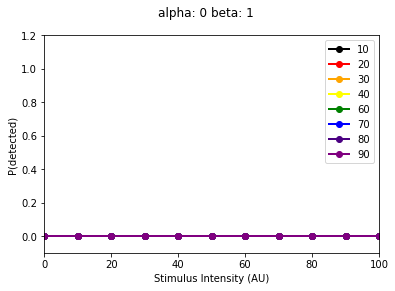

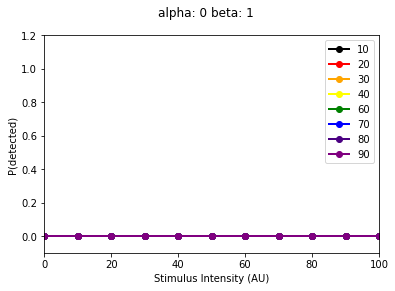

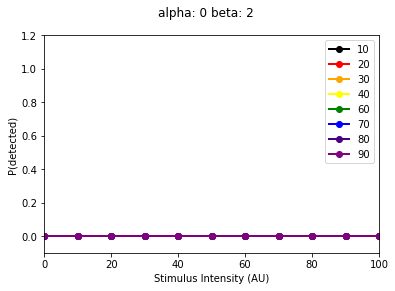

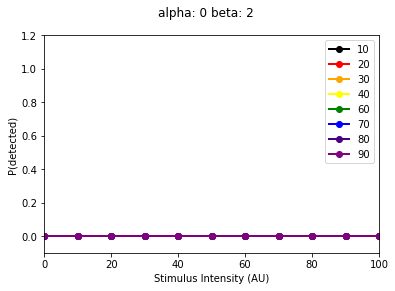

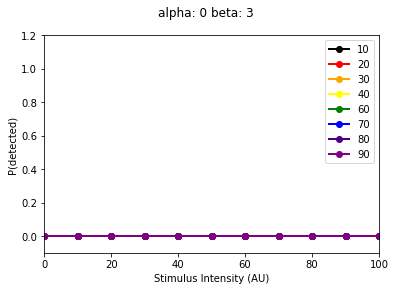

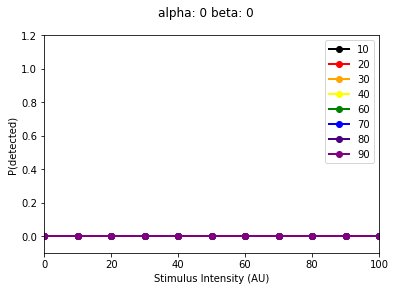

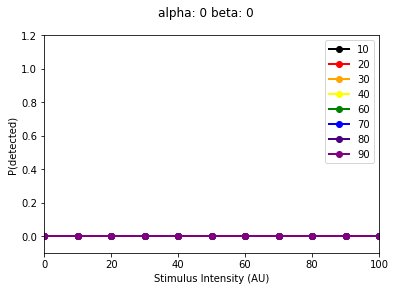

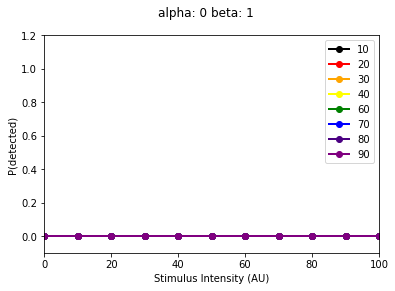

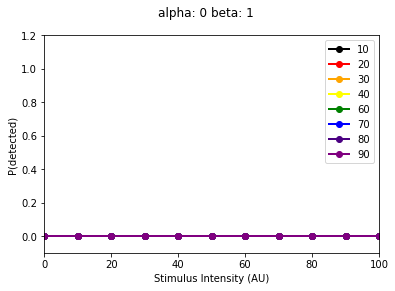

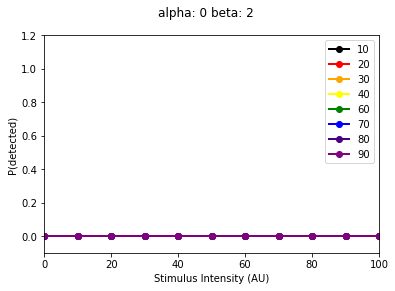

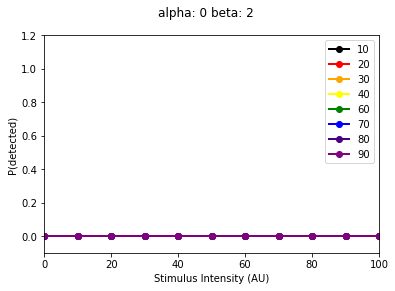

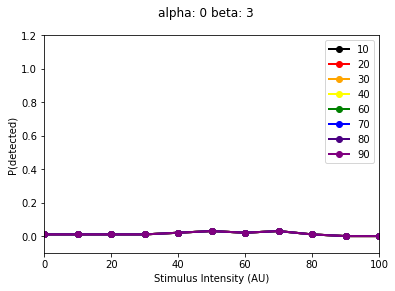

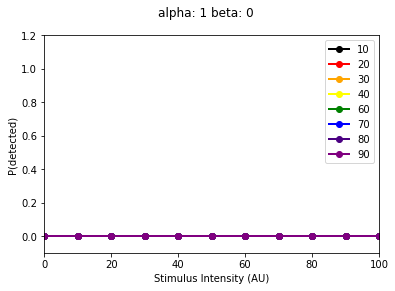

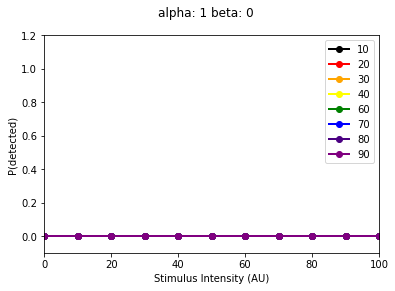

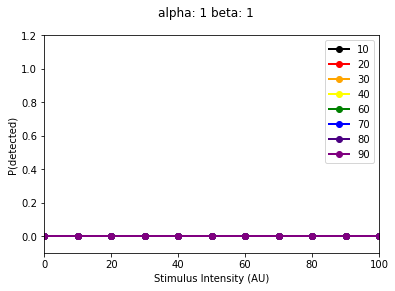

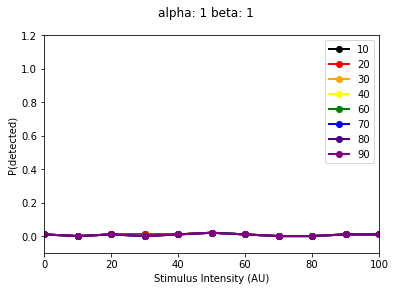

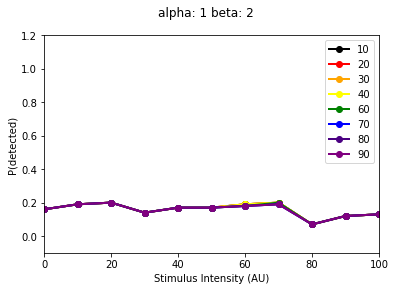

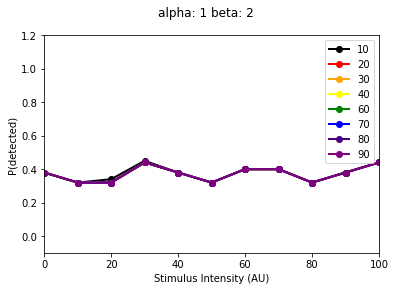

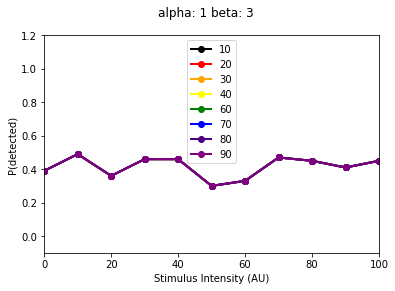

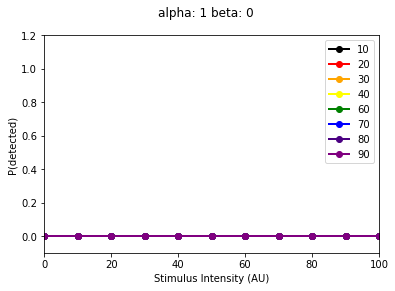

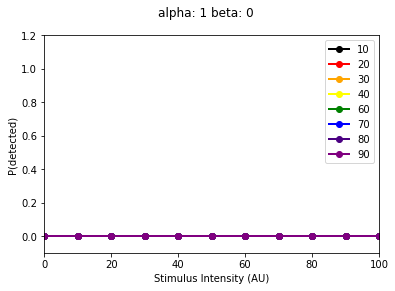

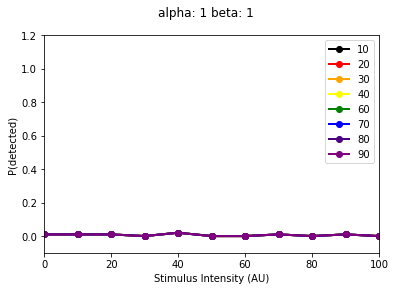

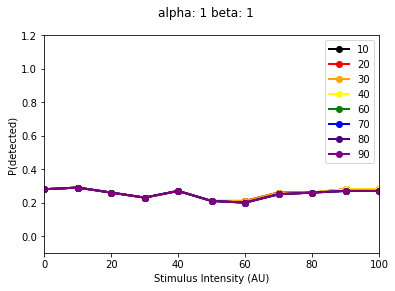

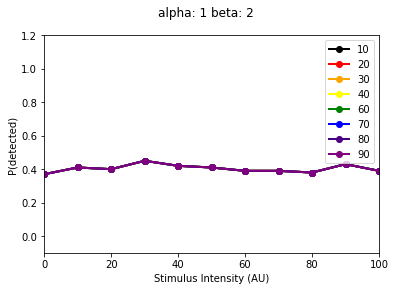

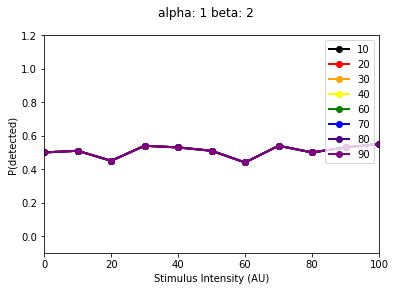

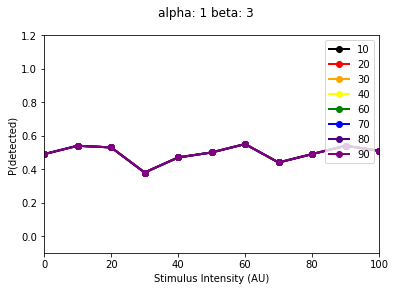

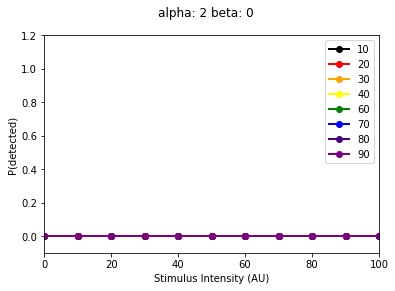

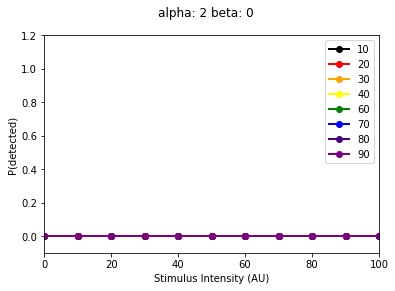

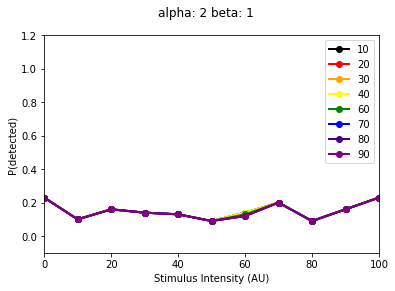

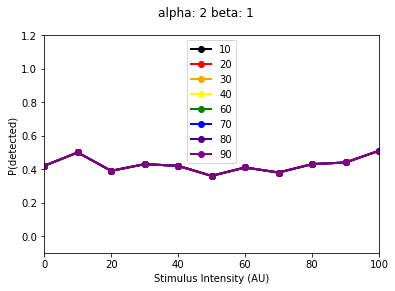

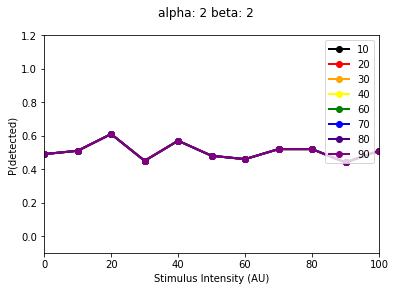

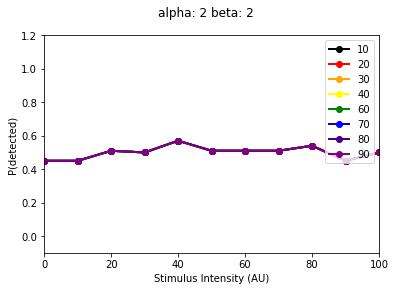

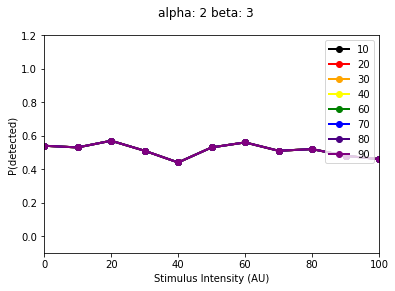

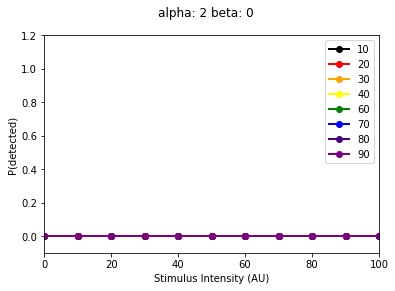

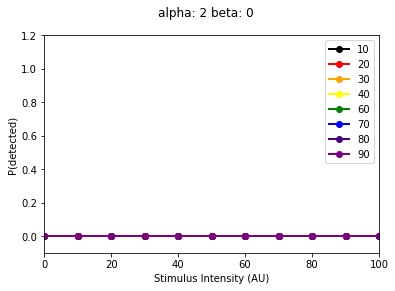

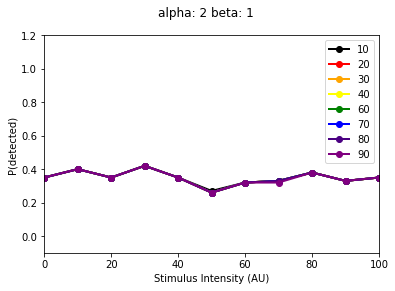

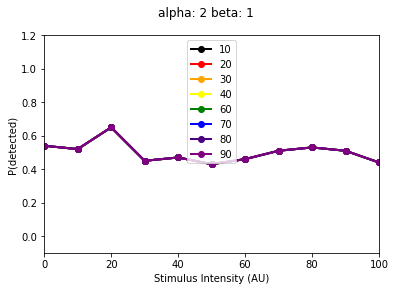

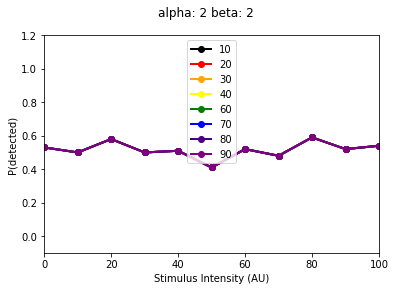

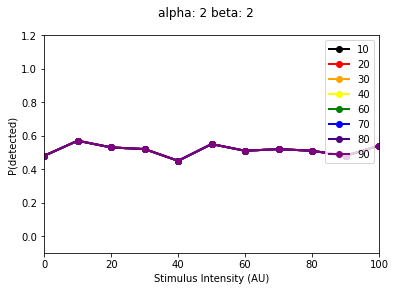

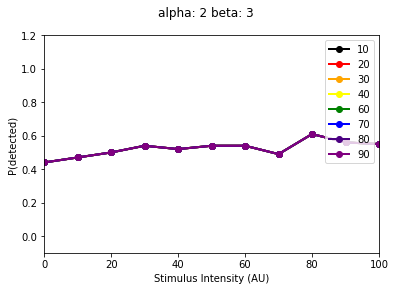

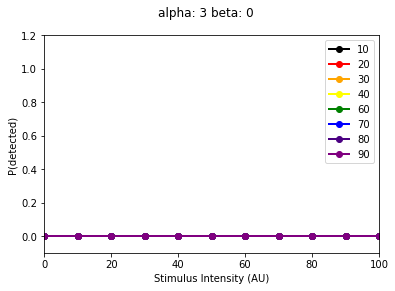

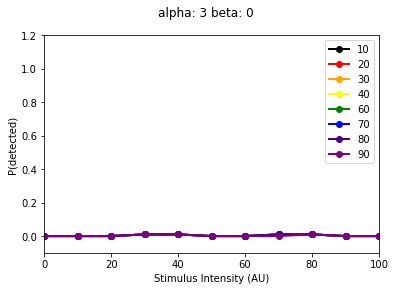

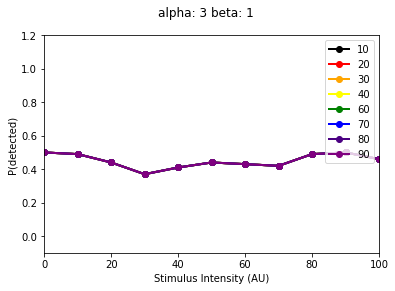

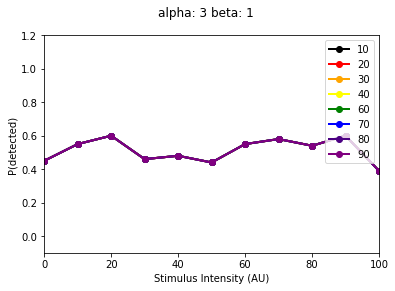

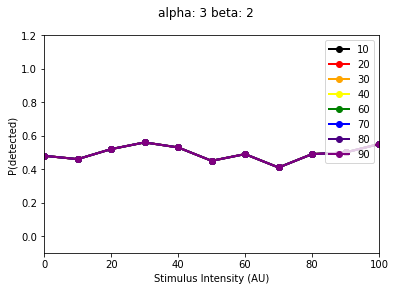

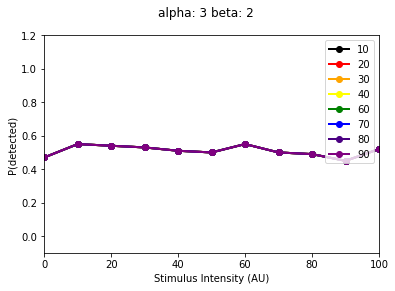

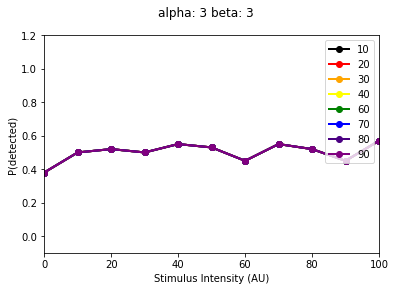

In [12]:
for i in range(len(alphas)):
    for j in range(len(betas)):
        mean_fifty_prob = get_fifty_prob(alphas[i], betas[j])
        pr_correct = []
        
        for k in range(len(mus)):
            if mus[k] == 50:
                pass
            non_fifty_prob = get_non_zero_prob(stim_x, mus[k], alphas[i], betas[j])
            
            detect_resp =  detect(n_trial, stim_x, mean_fifty_prob, non_fifty_prob)
            cur_pr_correct = analysis(detect_resp)
            pr_correct.append(cur_pr_correct)
        
        plt.suptitle("alpha: %d beta: %d" %(alphas[i], betas[j]))
        plt.plot(stim_x, pr_correct[0], color='black', marker='o', lw=2, label="10")
        plt.plot(stim_x, pr_correct[1], color='red', marker='o', lw=2, label="20")
        plt.plot(stim_x, pr_correct[2], color='orange', marker='o', lw=2, label="30")
        plt.plot(stim_x, pr_correct[3], color='yellow', marker='o', lw=2, label="40")
        plt.plot(stim_x, pr_correct[4], color='green', marker='o', lw=2, label="60")
        plt.plot(stim_x, pr_correct[5], color='blue', marker='o', lw=2, label="70")
        plt.plot(stim_x, pr_correct[6], color='indigo', marker='o', lw=2, label="80")
        plt.plot(stim_x, pr_correct[7], color='purple', marker='o', lw=2, label="90")
        plt.legend()
        plt.xlim(0, 100)
        plt.ylim(-0.1, 1.2)
        plt.xlabel("Stimulus Intensity (AU)")
        plt.ylabel("P(detected)")
        plt.show()